In [1]:
import zipfile
from os import walk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)


In [2]:
df_gender = pd.read_csv("data/Gender_StatsCSV.csv")
df_parity = pd.read_csv("data/School enrollment, gender parity index.csv")
df_UNSD = pd.read_csv("data/UNSD_Methodology.csv", on_bad_lines='skip')

In [3]:
#See raw df we will be working with
df_parity.head()

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,Disaggregation
0,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Africa Eastern and Southern,AFE,2020,0.944,"Primary and Secondary, total"
1,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Africa Eastern and Southern,AFE,2019,0.941,"Primary and Secondary, total"
2,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Africa Eastern and Southern,AFE,2018,0.940,"Primary and Secondary, total"
3,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Africa Eastern and Southern,AFE,2017,0.943,"Primary and Secondary, total"
4,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Africa Eastern and Southern,AFE,2016,0.945,"Primary and Secondary, total"


In [124]:
df_parity[df_parity["Country Name"] == "Suriname"]

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,Disaggregation
7472,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Suriname,SUR,2021,1.085,"Primary and Secondary, total"
7473,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Suriname,SUR,2015,1.134,"Primary and Secondary, total"
7474,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Suriname,SUR,2014,1.155,"Primary and Secondary, total"
7475,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Suriname,SUR,2013,1.145,"Primary and Secondary, total"
7476,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Suriname,SUR,2012,1.133,"Primary and Secondary, total"
7477,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Suriname,SUR,2011,1.133,"Primary and Secondary, total"
7478,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Suriname,SUR,2010,1.105,"Primary and Secondary, total"
7479,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Suriname,SUR,2009,1.092,"Primary and Secondary, total"
7480,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Suriname,SUR,2008,1.115,"Primary and Secondary, total"
7481,"School enrollment, primary and secondary (gros...",SE.ENR.PRSC.FM.ZS,Suriname,SUR,2007,1.128,"Primary and Secondary, total"


In [4]:
#Verify that there are no NaNs in the df
df_parity.isnull().values.any()

False

In [5]:
#Determine the different Indicators in DataFrame and verify missing values (double check)
df_parity.groupby("Indicator Name").count()

,Indicator Code,Country Name,Country Code,Year,Value,Disaggregation
Indicator Name,,,,,,
"School enrollment, primary (gross), gender parity index (GPI)",9893,9893,9893,9893,9893,9893
"School enrollment, primary and secondary (gross), gender parity index (GPI)",8236,8236,8236,8236,8236,8236
"School enrollment, secondary (gross), gender parity index (GPI)",8413,8413,8413,8413,8413,8413
"School enrollment, tertiary (gross), gender parity index (GPI)",7759,7759,7759,7759,7759,7759


### Indicator Selection
This dataframe contains four (4) indicators with respect to educational level. 
The four indicators are:
- School enrollment primary, GPI               -> primary school                         
- School enrollment primary and secondary, GPI -> primary school and high school
- School enrollment secondary, GPI             -> high school
- School enrollment tertiary, GPI              -> College / University

For our preciction goals, I suspect that indicator two (primary and high school comined) does not add any value. Therefore I suggest we **drop this indicator** and associated rows. Our selection of indicator therefore will be: 

- School enrollment primary, GPI               -> primary school                         
- School enrollment secondary, GPI             -> high school
- School enrollment tertiary, GPI              -> College / University

In [6]:
#Make a list of relevant indicator codes, will use this later to create the clean df
indicator_codes = ['SE.ENR.PRIM.FM.ZS', 'SE.ENR.SECO.FM.ZS','SE.ENR.TERT.FM.ZS']
df_parity["Indicator Code"].unique()

array(['SE.ENR.PRSC.FM.ZS', 'SE.ENR.PRIM.FM.ZS', 'SE.ENR.SECO.FM.ZS',
       'SE.ENR.TERT.FM.ZS'], dtype=object)

In [7]:
#Check the values of the digaggregation column to determine if the column adds value
df_parity["Disaggregation"].unique()

array(['Primary and Secondary, total', 'Primary, total',
       'Secondary, total', 'Tertiary, total'], dtype=object)

In [83]:
#Find the unique country codes in this df. This list will be later used to exclude countries not part of UN assambly
parity_countries = list(df_parity["Country Code"].unique())
#parity_wd = ['European Union']
parity_wd = ['European Union', 'North America', 'Middle East & North Africa', 'Sub-Saharan Africa', 'Latin America & Caribbean','East Asia & Pacific','South Asia']


#Get Country codes from all countries that appear in TXT file, from 1970 onwards. 
UN_countries = set()
path = r'\Users\Greg\Desktop\UvA\Msc IS-DS\FDS\Assignment_1\DSAss1\DSAss1\TXT'

for root, dirc, files in walk(path):
    for FileName in files:
        UN_countries.add(FileName[0:3])
        
UN_countries = list(UN_countries)

#Create intersect of countries that appear in UN assambly dataset and in parity dataset. Do a sanity check by comparing list lengths
intersect_countries = [code for code in parity_countries if code in UN_countries]

intersect_countries[:10], len(intersect_countries), len(UN_countries), len(parity_countries)

(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT'],
 194,
 203,
 256)

### Column Selection

- If we have a look at the "Disaggregation" column values, we see that the values in this column correspond with the values in the "indicator name" and "indicator code". This column does not add any value. We will therefore **drop the "Disaggregation" column**.
- "Indicator Name" and "Indicator Code" give the same information, I opted to drop "Indicator Name" As this contains significantly longer strings
- We have generated a list with country codes that we want to include in our analysis. Because we have a list of codes, we will only make use of the "Country code" column. Because it does not add any value, we will **drop the "Country name" column**.



In [10]:
#Create a new df with the filtering choices we have made above (I think there should be a better way to create this df, but it works for now

df_parity_clean = df_parity[["Indicator Code","Country Code","Year","Value"]]
df_parity_clean = df_parity_clean[df_parity_clean["Country Code"].isin(intersect_countries)]
df_parity_clean = df_parity_clean[df_parity_clean["Indicator Code"].isin(indicator_codes)]

#Replace the complex hard to read indicator codes with the natural terms
df_parity_clean = df_parity_clean.replace({"SE.ENR.PRIM.FM.ZS":"Primary", "SE.ENR.SECO.FM.ZS":"Secondary", "SE.ENR.TERT.FM.ZS":"Tertiary"})

In [29]:
df_wd_clean = df_parity[["Indicator Code","Country Name","Year","Value"]]
df_wd_clean = df_wd_clean[df_wd_clean["Country Name"].isin(parity_wd)]
df_wd_clean = df_wd_clean[df_wd_clean["Indicator Code"].isin(indicator_codes)]

df_wd_clean = df_wd_clean.replace({"SE.ENR.PRIM.FM.ZS":"Primary", "SE.ENR.SECO.FM.ZS":"Secondary", "SE.ENR.TERT.FM.ZS":"Tertiary"})

In [63]:
df_wd_clean[df_wd_clean["Country Name"] == "European Union"][:5]

,Indicator Code,Country Name,Year,Value
8879,Primary,European Union,2020,1.000
8880,Primary,European Union,2019,0.999
8881,Primary,European Union,2018,0.996
8882,Primary,European Union,2017,0.997
8883,Primary,European Union,2016,1.000


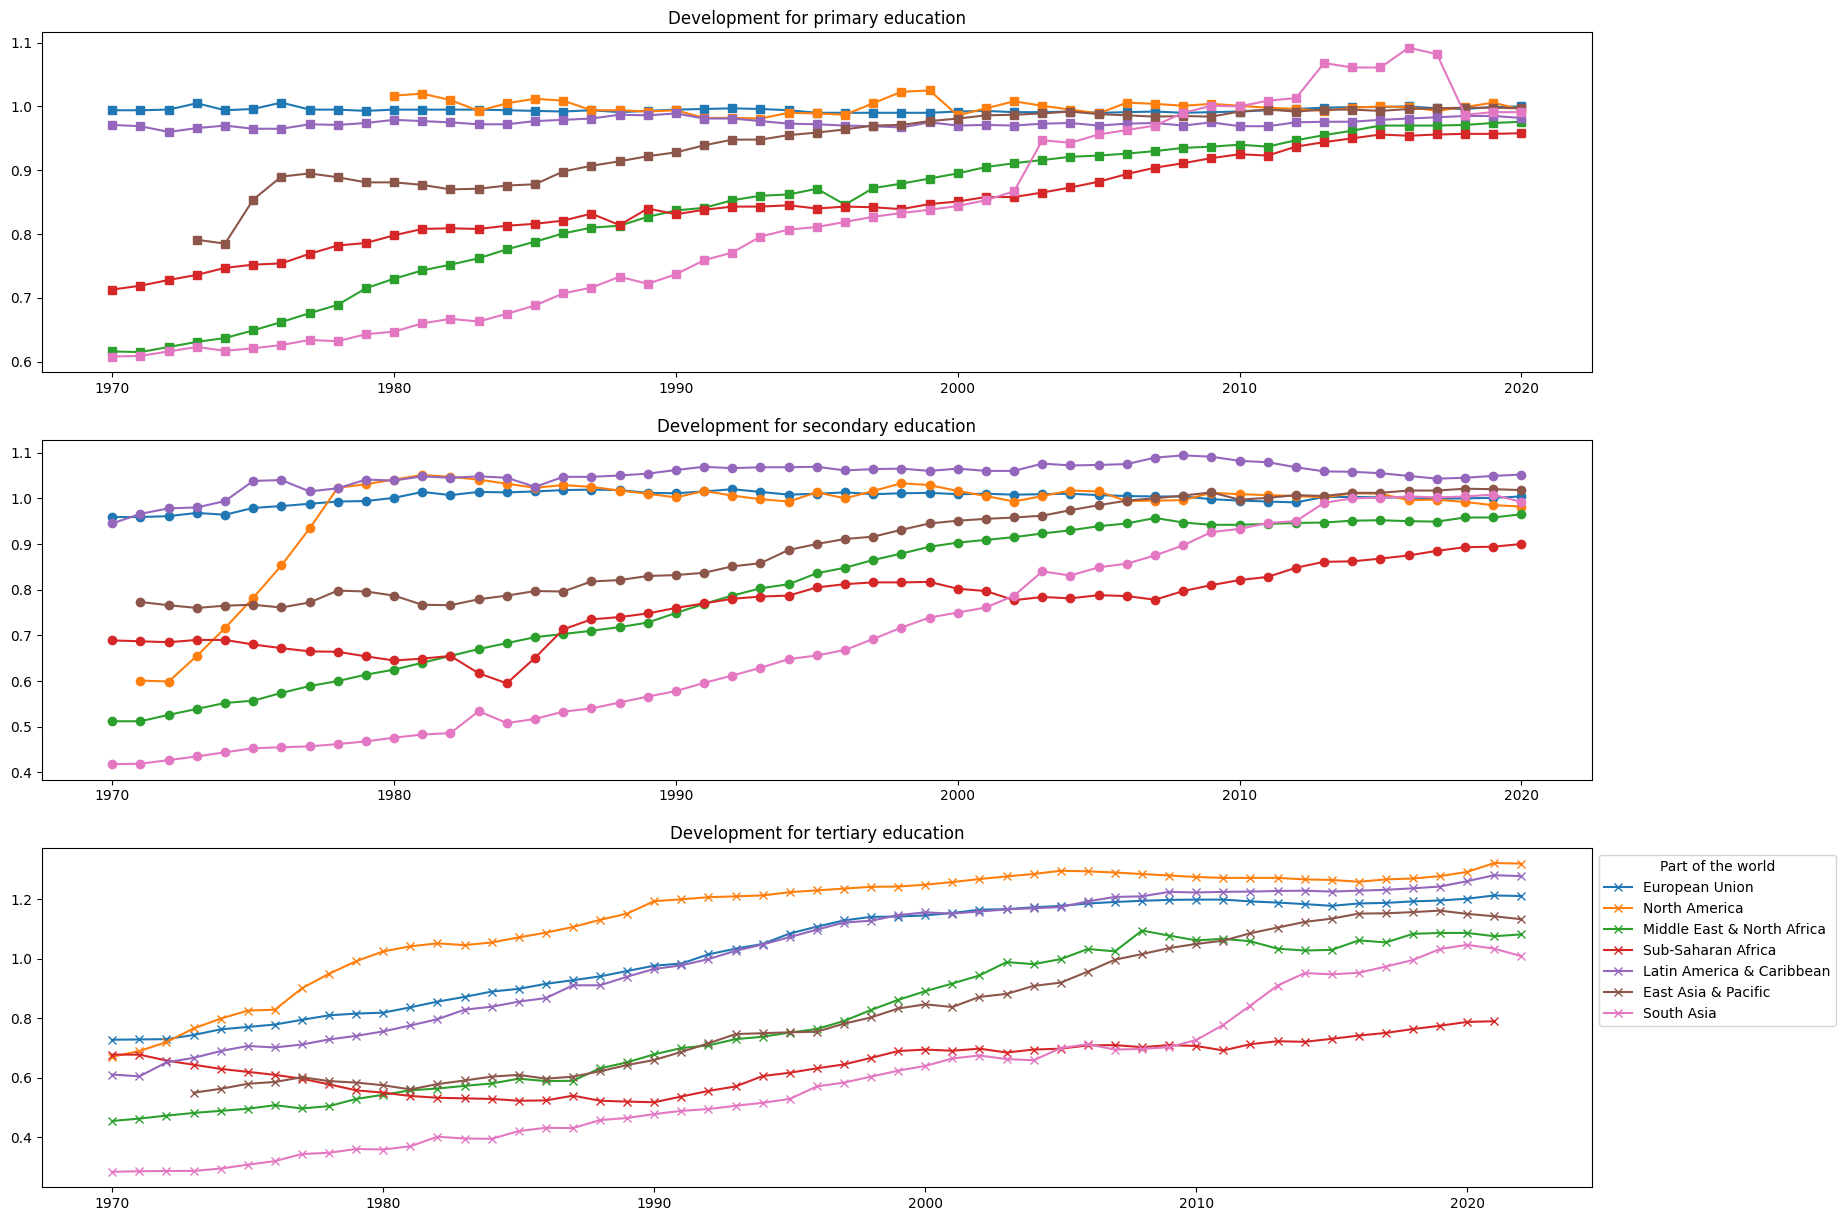

In [125]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))  # Increase figure size


# Plot each country's GPI over time
for country in parity_wd:
    data = df_wd_clean[df_wd_clean["Country Name"] == country]
    prim = data[data["Indicator Code"] == "Primary"]
    sec = data[data["Indicator Code"] == "Secondary"]
    tert = data[data["Indicator Code"] == "Tertiary"]
    
    ax1 = plt.subplot(3,1,1)
    ax1.set_title("Development for primary education")
    plt.plot(prim['Year'], prim['Value'], marker='s', label=country)

    ax2 = plt.subplot(3,1,2)
    ax2.set_title("Development for secondary education")
    plt.plot(sec['Year'], sec['Value'], marker='o', label=country)

    
    ax3 = plt.subplot(3,1,3)
    ax3.set_title("Development for tertiary education")
    plt.plot(tert['Year'], tert['Value'], marker='x', label=country)


# Move legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Part of the world')

plt.show()